In [1]:
run_name = 'current'

In [2]:
import os
import glob
from functools import reduce

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Client side analysis

In [4]:
# read in the data
data_dict = dict()

for d in glob.glob("./results/" + run_name + "/httperf_*_percentiles_rate_6000"):
    data_list = []
    for i in glob.glob(d + "/httperf_client_*.csv"):
        data_list.append(pd.read_csv(i, header=0, na_filter=False))
    
    data_frame = pd.DataFrame()
    if len(data_list) > 0:
        for i in list(data_list[0]):
            if not i.startswith('Response time'):
                data_frame[i] = reduce(lambda x, y: x + y, [data_list[j][i] for j in range(len(data_list))])
            else:
                data_frame[i] = reduce(lambda x, y: x + y, [data_list[j][i] for j in range(len(data_list))]) / len(data_list)
    data_dict[os.path.basename(d)] = data_frame

### 1. Response rate analysis (percentiles)

In [5]:
plot_rrp_unbalance = dict()
plot_rrp_balance = dict()

for d in data_dict:
    if '_unbalance_' in d:
        plot_rrp_unbalance[d] = data_dict[d][['Rate', 'Request rate', 'Response rate 50%', 'Response rate 66%', 'Response rate 75%', 'Response rate 80%', 'Response rate 90%', 
         'Response rate 95%', 'Response rate 98%', 'Response rate 99%', 'Response rate 100%']]
    if '_balance_' in d:
        plot_rrp_balance[d] = data_dict[d][['Request rate', 'Response rate 50%', 'Response rate 66%', 'Response rate 75%', 'Response rate 80%', 'Response rate 90%', 
         'Response rate 95%', 'Response rate 98%', 'Response rate 99%', 'Response rate 100%']]

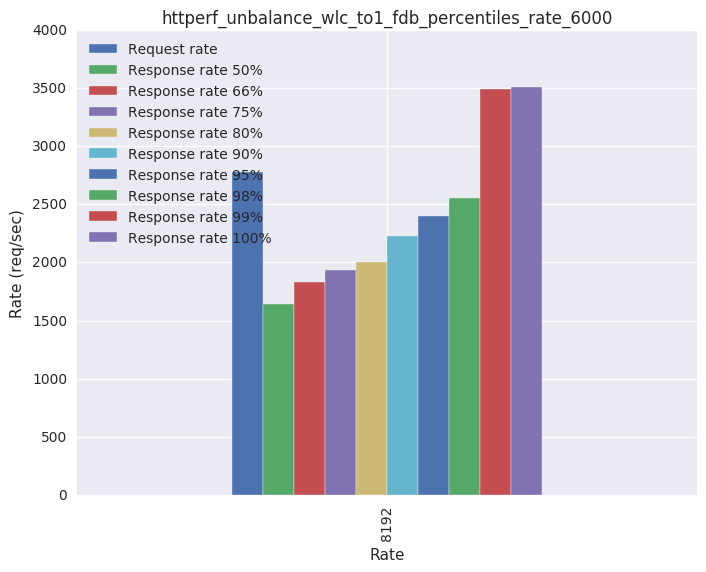

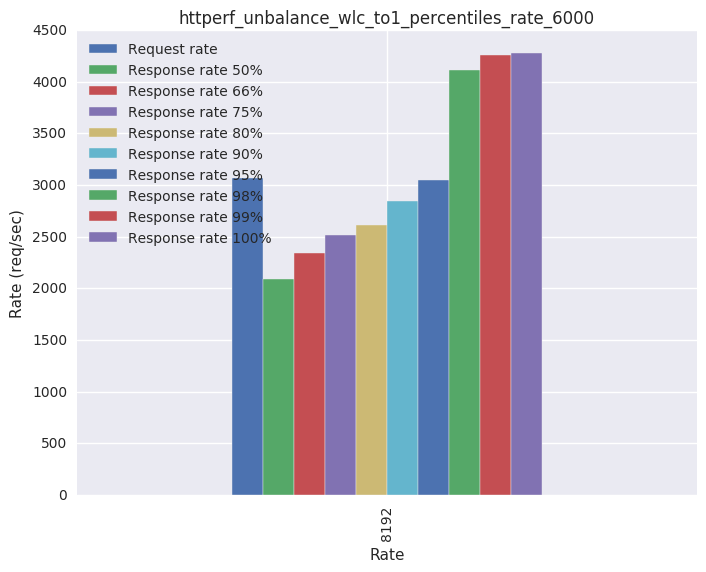

In [8]:
for d in data_dict:
    plot = plot_rrp_unbalance[d].plot('Rate', kind='bar', title=d).set_ylabel('Rate (req/sec)')

### 2. Response time analysis (percentiles)

In [9]:
plot_rtp_unbalance = dict()
plot_rtp_balance = dict()

for d in data_dict:
    if '_unbalance_' in d:
        plot_rtp_unbalance[d] = data_dict[d][['Rate', 'Response time', 'Response time 50%', 'Response time 66%', 'Response time 75%', 'Response time 80%', 'Response time 90%', 
          'Response time 95%', 'Response time 98%', 'Response time 99%', 'Response time 100%']]
    if '_balance_' in d:
        plot_rtp_balance[d] = data_dict[d][['Rate', 'Response time', 'Response time 50%', 'Response time 66%', 'Response time 75%', 'Response time 80%', 'Response time 90%', 
          'Response time 95%', 'Response time 98%', 'Response time 99%', 'Response time 100%']]

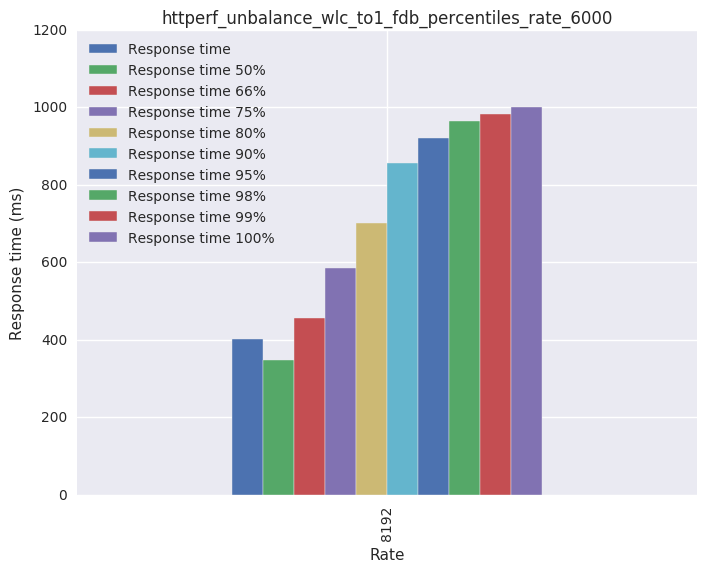

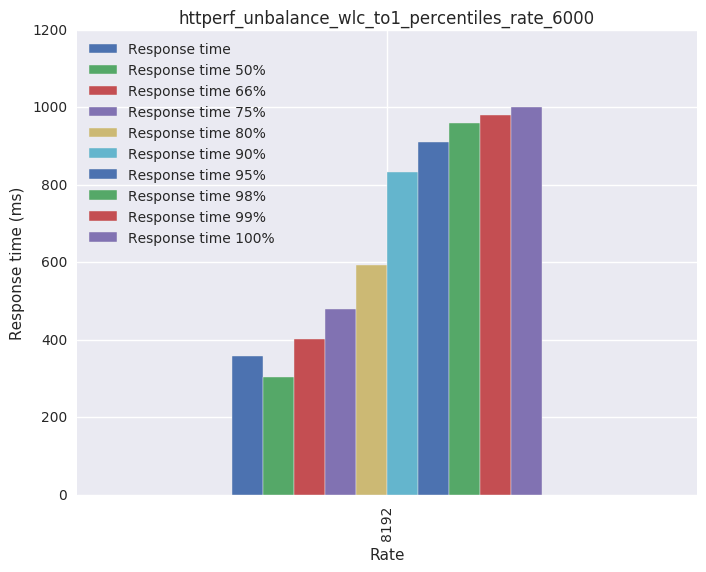

In [11]:
for d in data_dict:
    plot_rtp_unbalance[d].plot('Rate', kind='bar', title=d).set_ylabel('Response time (ms)')

## Server side analysis

In [12]:
# read in the data
stats_dict = dict()

for d in glob.glob("./results/" + run_name + "/httperf_*_percentiles_rate_6000"):
    stats_frame = pd.read_csv(d + "/httperf_server_stats.csv", header=0, na_filter=False)
    for i in ['Connections', 'Packets', 'Bytes (K)']:
        stats_frame[i + ' Ratio (%)'] = stats_frame[i] / sum(stats_frame[i]) * 100
    
    stats_dict[os.path.basename(d)] = stats_frame

### 1. Connections ratio (%)

In [13]:
plot_connections_unbalance = pd.DataFrame()
plot_connections_balance = pd.DataFrame()

plot_connections_unbalance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
plot_connections_balance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
    
for d in stats_dict:
    if '_unbalance_' in d:
        plot_connections_unbalance['Connections Ratio (%) - ' + d] = stats_dict[d]['Connections Ratio (%)']
    if '_balance_' in d:
        plot_connections_balance['Connections Ratio (%) - ' + d] = stats_dict[d]['Connections Ratio (%)']

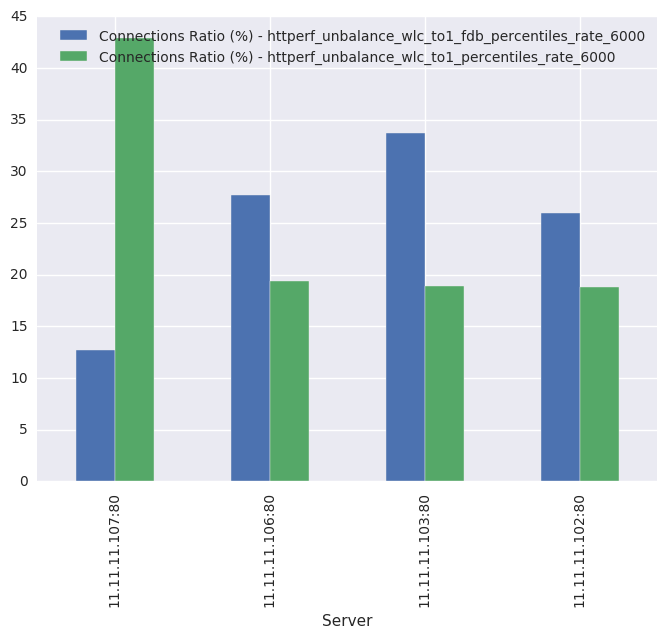

In [15]:
plot_connections_unbalance.plot('Server', kind='bar')